## Martijns EDA notebook

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

In [6]:
df = pd.read_csv('../martijn/martijn-nsrdb.csv')
print(df.shape)
df.head()

(87696, 22)


,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,...,DNI,Fill Flag,GHI,Relative Humidity,Solar Zenith Angle,Surface Albedo,Pressure,Precipitable Water,Wind Direction,Wind Speed
0,2016,1,1,0,0,5.0,0,0,0,0,...,0,0,0,49.00,168.95,0.128,990,0.472,55.7,4.0
1,2016,1,1,0,30,5.0,0,0,0,0,...,0,0,0,49.00,166.74,0.128,990,0.477,55.7,4.0
2,2016,1,1,1,0,5.0,0,0,0,0,...,0,0,0,48.97,162.23,0.128,990,0.482,55.7,4.1
3,2016,1,1,1,30,5.0,0,0,0,0,...,0,0,0,48.97,156.74,0.128,990,0.489,55.7,4.1
4,2016,1,1,2,0,5.0,0,0,0,0,...,0,0,0,48.98,150.83,0.128,990,0.496,56.0,4.2


In [7]:
df.isna().sum()

Year                  0
Month                 0
Day                   0
Hour                  0
Minute                0
Temperature           0
Clearsky DHI          0
Clearsky DNI          0
Clearsky GHI          0
Cloud Type            0
Dew Point             0
DHI                   0
DNI                   0
Fill Flag             0
GHI                   0
Relative Humidity     0
Solar Zenith Angle    0
Surface Albedo        0
Pressure              0
Precipitable Water    0
Wind Direction        0
Wind Speed            0
dtype: int64

Which features are most predictive for present-day GHI?

In [8]:
df.columns

Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Temperature', 'Clearsky DHI',
       'Clearsky DNI', 'Clearsky GHI', 'Cloud Type', 'Dew Point', 'DHI', 'DNI',
       'Fill Flag', 'GHI', 'Relative Humidity', 'Solar Zenith Angle',
       'Surface Albedo', 'Pressure', 'Precipitable Water', 'Wind Direction',
       'Wind Speed'],
      dtype='object')

In [13]:
features = ['Wind Speed', 'Wind Direction', 'Dew Point', 'Cloud Type', 'Relative Humidity', 'Pressure', 'Temperature', 'Solar Zenith Angle', 'GHI']

<Axes: >

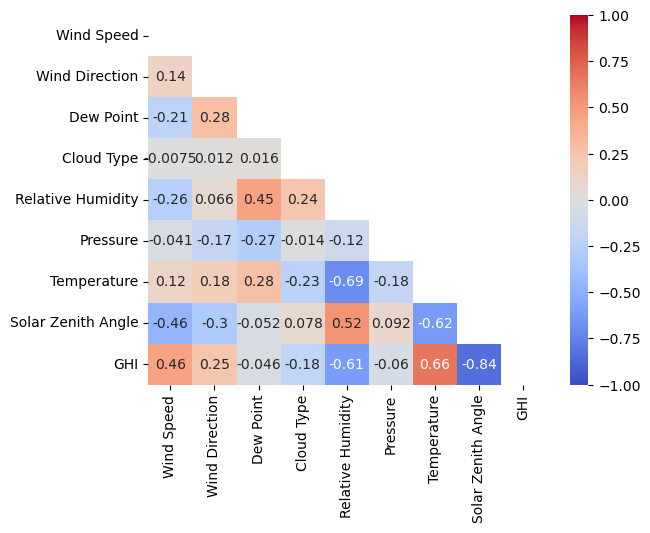

In [16]:
corr = df[features].corr()
mask = np.zeros(corr.shape)
mask[np.triu_indices_from(corr)] = True
sns.heatmap(corr, cmap='coolwarm', vmin=-1, vmax=1, annot=True, mask=mask)

Next, I would like to look at how clouds affect the GHI. Clouds can probably be pretty important, because 

N/A': -15,
'Clear': 0, 'Probably Clear': 1, 'Fog': 2, 'Water': 3, 'Super-Cooled Water': 4, 'Mixed': 5, 'Opaque
Ice': 6, 'Cirrus': 7, 'Overlapping': 8, 'Overshooting': 9, 'Unknown': 10, 'Dust': 11, 'Smoke': 12.

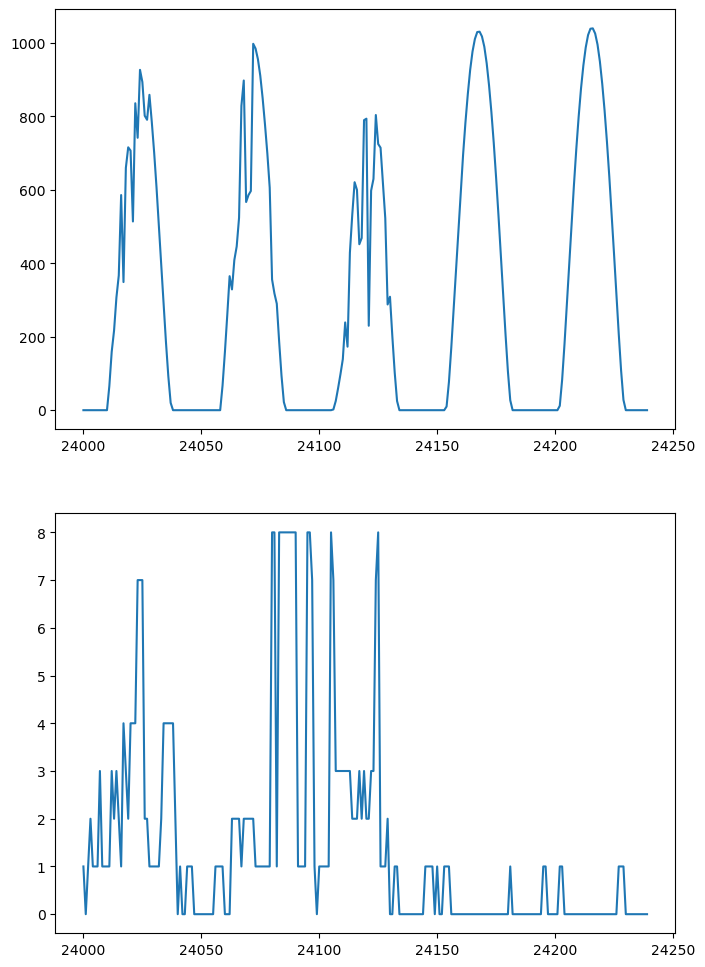

In [23]:
GHI = df['GHI']

i = 500
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 12))
ax1.plot(GHI[i*48:(i+5)*48])
ax2.plot(df['Cloud Type'][i*48:(i+5)*48])

plt.show()

How does the average GHI evolve throughout the full 5 years of the dataset?

In [40]:
def calc_daily_mean(input_arr):
    ml = []
    for i in range(0, len(input_arr), 48):
        ml.append(np.mean(input_arr[i:i+48]))
    return np.array(ml)

In [41]:
mean_GHI = calc_mean(df['GHI'])

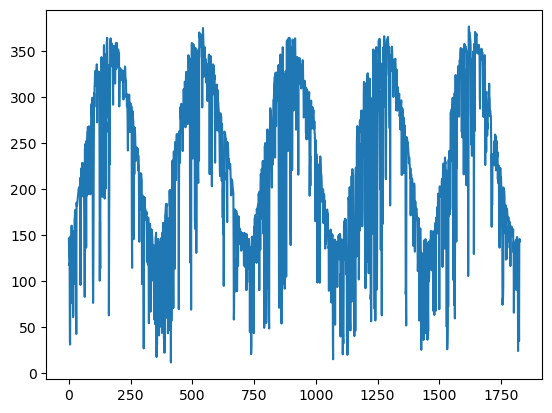

In [42]:
plt.plot(mean_GHI)
plt.show()